In [74]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1YQBQ3bu1TCmgrRch1gzW5O4Jgc8huzUSr7VUkxg0KIw/export?gid=283387421&format=csv"

df = pd.read_csv(url)

df

,Carimbo de data/hora,Como conheceu o Téo Me Why?,Quantos cursos acompanhou do Téo Me Why?,Curte games?,Curte futebol?,Curte livros?,Curte jogos de tabuleiro?,Curte jogos de fórmula 1?,Curte jogos de MMA?,Idade,Estado que mora atualmente,Área de Formação,Tempo que atua na área de dados,Posição da cadeira (senioridade),Você se considera uma pessoa feliz?
0,12/06/2025 10:59:27,LinkedIn,0,Sim,Não,Sim,Sim,Sim,Não,34,MG,Exatas,Mais de 4 anos,Sênior,Sim
1,12/06/2025 10:59:34,Twitch,Mais que 3,Sim,Sim,Sim,Não,Não,Sim,26,MG,Exatas,Não atuo,Iniciante,Sim
2,12/06/2025 10:59:36,YouTube,Mais que 3,Sim,Sim,Sim,Sim,Sim,Sim,39,SC,Exatas,De 1 ano a 2 anos,Júnior,Sim
3,12/06/2025 10:59:37,YouTube,Mais que 3,Sim,Sim,Sim,Sim,Sim,Não,27,SP,Exatas,Mais de 4 anos,Pleno,Sim
4,12/06/2025 10:59:41,Twitch,2,Sim,Sim,Sim,Sim,Não,Não,29,CE,Exatas,De 1 ano a 2 anos,Pleno,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,13/06/2025 11:23:48,Amigos,2,Sim,Sim,Sim,Não,Sim,Não,33,SC,Humanas,de 2 anos a 4 anos,Júnior,Sim
178,13/06/2025 11:41:05,Twitch,Mais que 3,Sim,Sim,Sim,Sim,Sim,Sim,32,PR,Biológicas,Mais de 4 anos,Sênior,Sim
179,13/06/2025 20:45:50,Twitter / X,1,Sim,Sim,Sim,Sim,Não,Não,39,SP,Exatas,Não atuo,Iniciante,Não
180,14/06/2025 18:09:20,LinkedIn,1,Sim,Não,Sim,Não,Não,Não,25,SP,Exatas,De 1 ano a 2 anos,Pleno,Não


In [75]:
df = df.replace({"Sim": 1, "Não": 0})

num_vars = [
    'Curte games?',
    'Curte futebol?',
    'Curte livros?',
    'Curte jogos de tabuleiro?',
    'Curte jogos de fórmula 1?',
    'Curte jogos de MMA?',
    'Idade',
]

dummy_vars = [
    "Como conheceu o Téo Me Why?",	
    "Quantos cursos acompanhou do Téo Me Why?",
    "Estado que mora atualmente",
    "Área de Formação",	
    "Tempo que atua na área de dados",	
    "Posição da cadeira (senioridade)"
]

df_analise = pd.get_dummies(df[dummy_vars]).astype(int)
df_analise[num_vars] = df[num_vars].copy()
df_analise['pessoa_feliz']=df['Você se considera uma pessoa feliz?'].copy()

C:\Users\Renan Casalle\AppData\Local\Temp\ipykernel_32020\4137482249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Sim": 1, "Não": 0})


In [76]:
from sklearn import tree
from sklearn import naive_bayes
from sklearn import linear_model

features = df_analise.columns[:-1].to_list()

X = df_analise.drop(columns=['pessoa_feliz'])
y = df_analise['pessoa_feliz']

SEED = 42

tree_model = tree.DecisionTreeClassifier(random_state=SEED,
                            min_samples_leaf=5,
                            )

tree_model.fit(X, y)

naive = naive_bayes.GaussianNB()
naive.fit(X, y)

reg = linear_model.LogisticRegression(penalty=None, fit_intercept=True)
reg.fit(X, y)

C:\Users\Renan Casalle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [77]:
tree_predict = tree_model.predict(X)
tree_predict 

df_predict = df_analise[['pessoa_feliz']].copy()
df_predict['predict_tree'] = tree_predict
df_predict['proba_tree'] = tree_model.predict_proba(X)[:, 1]    

df_predict['predict_naive'] = naive.predict(X)
df_predict['proba_naive'] = naive.predict_proba(X)[:, 1]

df_predict['predict_reg'] = reg.predict(X)
df_predict['proba_reg'] = reg.predict_proba(X)[:, 1]

In [78]:
# Acurácia do modelo

print((df_predict['pessoa_feliz'] == df_predict['predict_tree']).mean())

# Matriz de confusão

pd.crosstab(df_predict['pessoa_feliz'], df_predict['predict_tree'])

0.8626373626373627


predict_tree,0,1
pessoa_feliz,,
0,16,19
1,6,141


In [79]:
from sklearn import metrics

acc_tree = metrics.accuracy_score(df_predict['pessoa_feliz'], df_predict['predict_tree'])
tree_precision = metrics.precision_score(df_predict['pessoa_feliz'], df_predict['predict_tree'])
recall_tree = metrics.recall_score(df_predict['pessoa_feliz'], df_predict['predict_tree'])
roc_tree = metrics.roc_curve(df_predict['pessoa_feliz'], df_predict['proba_tree'])
auc_tree = metrics.roc_auc_score(df_predict['pessoa_feliz'], df_predict['proba_tree'])

acc_naive = metrics.accuracy_score(df_predict['pessoa_feliz'], df_predict['predict_naive'])
naive_precision = metrics.precision_score(df_predict['pessoa_feliz'], df_predict['predict_naive'])
recall_naive = metrics.recall_score(df_predict['pessoa_feliz'], df_predict['predict_naive'])
roc_naive = metrics.roc_curve(df_predict['pessoa_feliz'], df_predict['proba_naive'])
auc_naive = metrics.roc_auc_score(df_predict['pessoa_feliz'], df_predict['proba_naive'])

acc_reg = metrics.accuracy_score(df_predict['pessoa_feliz'], df_predict['predict_reg'])
reg_precision = metrics.precision_score(df_predict['pessoa_feliz'], df_predict['predict_reg'])
recall_reg = metrics.recall_score(df_predict['pessoa_feliz'], df_predict['predict_reg'])
roc_reg = metrics.roc_curve(df_predict['pessoa_feliz'], df_predict['proba_reg'])
auc_reg = metrics.roc_auc_score(df_predict['pessoa_feliz'], df_predict['proba_reg'])

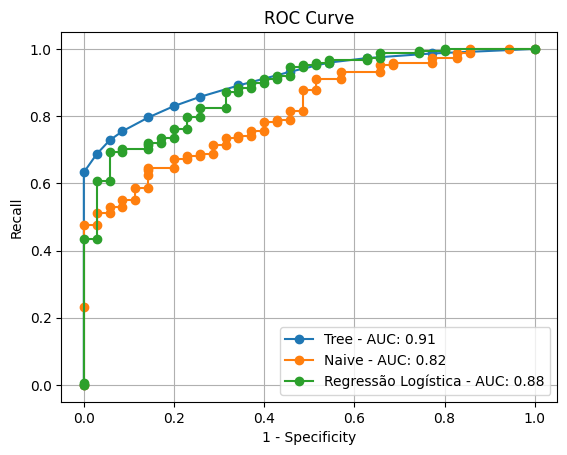

In [80]:
import matplotlib.pyplot as plt

plt.plot(roc_tree[0], roc_tree[1], 'o-')
plt.plot(roc_naive[0], roc_naive[1], 'o-')
plt.plot(roc_reg[0], roc_reg[1], 'o-')
plt.grid(True)
plt.title('ROC Curve')
plt.xlabel("1 - Specificity")
plt.ylabel("Recall")

plt.legend([f'Tree - AUC: {auc_tree:.2f}', f'Naive - AUC: {auc_naive:.2f}', f'Regressão Logística - AUC: {auc_reg:.2f}'])

In [82]:
pd.Series({"model": reg, "features": features}).to_pickle("model_reg.pkl")